# Artificial Neural Network

Créant et utilisant un réseau de neurones sont le principale emploi de Tensorflow.

- Pour l'entraînement de grandes réseaux, on a besoin de NVIDA GPU si on veut que il ne prend pas trop temps. Mais pour les petits réseaux un CPA peut être assez.
- Pour l'utilisation de réseaux entraînés, un ordinateur tant fort n'est pas necessaire. En fait, on peut emploi ces réseaux sur un smartphone ou Raspberri Pi.

Dans cette section, on va créer un réseau de ANN. C'est pour les problèmes de classification ou on a un table des features et les classes correspondant, par exemple, des spécies differents de forams et ses morphologies.

### 1. Lire l'information

Le plus facile moyen de lire l'information contenue dans un CSV est le logithèque `pandas`. 

Pandas cheat-sheet: https://github.com/pandas-dev/pandas/raw/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [1]:
import numpy as np
import pandas as pd

morph = pd.read_csv("morphology.csv")

Voir les premières 5 lignes

In [3]:
morph.head()

image           label    coreID  depthMin  \
0  bw-01_MD022508_40-41-000404-03.png        Planktic  MD022508      40.0   
1  bw-01_MD022508_40-41-000167-01.png      B_seminuda  MD022508      40.0   
2  bw-01_MD022508_40-41-000933-01.png  Other_particle  MD022508      40.0   
3  bw-01_MD022508_40-41-000968-01.png      B_seminuda  MD022508      40.0   
4  bw-01_MD022508_40-41-000668-01.png        Fragment  MD022508      40.0   

   depthMax  width  height    area  convexArea  circleArea    ...      \
0      41.0     90      90    3927        4004      4980.5    ...       
1      41.0    616     616   77015       79896    241397.8    ...       
2      41.0    482     482   97274      101863    133566.6    ...       
3      41.0    678     678   99070      104799    272566.3    ...       
4      41.0    528     528  118262      126216    164477.9    ...       

   circularity  roundness  perimeterRatio     mean  stddev  stddevInvariant  \
0        0.844      0.803           0.945  191.926  46.713            0.243   
1        0.533      0.313           0.928  144.963  37.066            0.256   
2        0.618      0.849           0.831  165.041  38.448            0.233   
3        0.512      0.368           0.873  135.104  35.710            0.264   
4        0.626      0.838           0.848  153.547  33.863            0.221   

   skewness  kurtosis  5thmoment  6thmoment  
0    -1.333     3.993     -9.132     24.202  
1    -0.497     3.033     -3.150     13.954  
2    -0.672     3.267     -5.282     17.810  
3    -0.810     3.399     -5.551     18.032  
4    -0.649     3.506     -5.624     21.007  

[5 rows x 27 columns]

Voir le type de données pour chaque collone

In [4]:
morph.dtypes

image               object
label               object
coreID              object
depthMin           float64
depthMax           float64
width                int64
height               int64
area                 int64
convexArea           int64
circleArea         float64
perimeter          float64
convexPerimeter    float64
majorAxisLength    float64
minorAxisLength    float64
eccentricity       float64
angle              float64
solidity           float64
circularity        float64
roundness          float64
perimeterRatio     float64
mean               float64
stddev             float64
stddevInvariant    float64
skewness           float64
kurtosis           float64
5thmoment          float64
6thmoment          float64
dtype: object

et les dimensions de données

In [5]:
morph.shape

(11902, 27)

Une collonne peut être selectée 

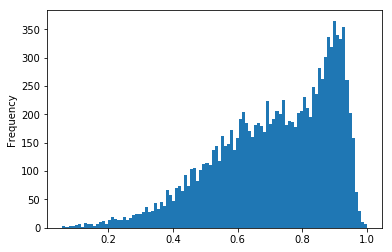

In [20]:
import matplotlib.pyplot
%matplotlib inline

morph['eccentricity']
#morph['eccentricity'].values
#morph['eccentricity'].plot.hist(100)
#morph.eccentricity.plot.hist(100)

### 2. Assigner les labels

Cette fois, les labels sont mots. On doit les transformer.

In [22]:
labels = pd.Categorical(morph.label)
print("Categories")
print(labels.categories)
print("Codes")
print(labels.codes)

Categories
Index(['B_argentea', 'B_seminuda', 'B_spissa', 'B_subadvena', 'B_tenuata',
       'Double', 'E_smithi', 'Fragment', 'Other_benthic', 'Other_particle',
       'Planktic', 'T_delicata', 'U_peregrina'],
      dtype='object')
Codes
[10  1  9 ...,  9  7  7]


### 3. Sélectionner les features intérressants

On peut calculer la cross-correlation de voir quels features sont intérressant.

À sélectionner les features, un méthode est le mot-clé pands `loc`. Regarder au cheat-sheat pandas pour les autres.

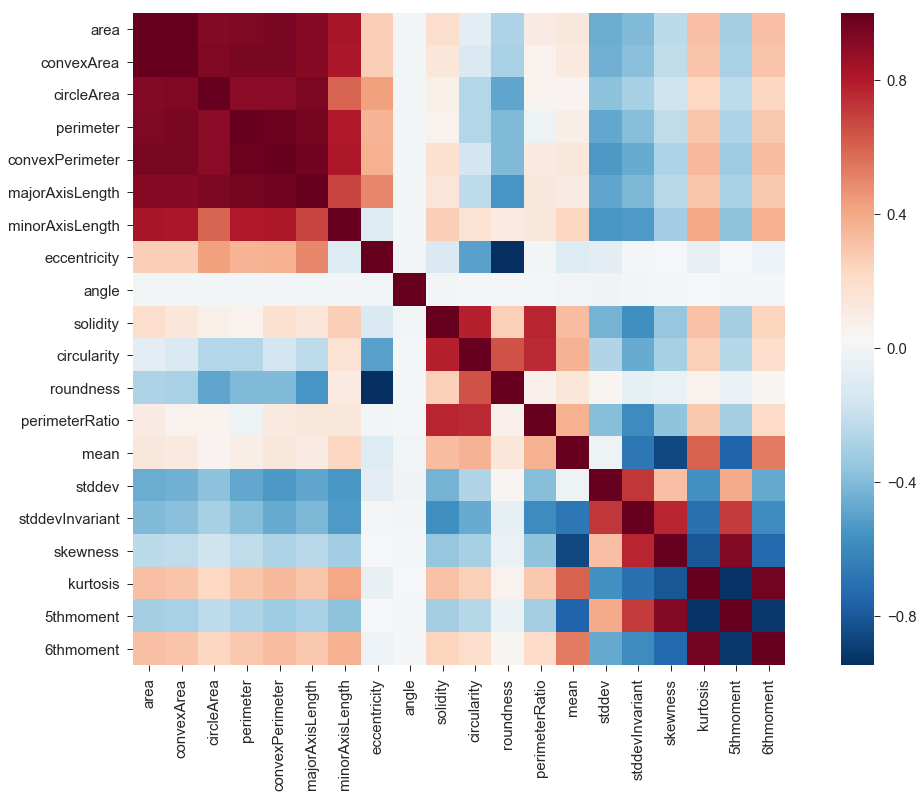

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', palette='RdBu_r', font_scale=1.5)

#corr_mat = morph.corr() 
corr_mat = morph.loc[:,"area":"6thmoment"].corr() 
fig, ax = plt.subplots(figsize=(20, 12)) 
sns.heatmap(corr_mat, vmax=1.0, square=True, ax=ax, cmap='RdBu_r')

On nous limite à les features de morphologie

In [46]:
vectors = morph.loc[:, "area":"perimeterRatio"]
vectors.head()

area  convexArea  circleArea  perimeter  convexPerimeter  \
0    3927        4004      4980.5      241.7            228.5   
1   77015       79896    241397.8     1348.0           1251.4   
2   97274      101863    133566.6     1406.4           1168.6   
3   99070      104799    272566.3     1559.6           1362.0   
4  118262      126216    164477.9     1540.4           1306.5   

   majorAxisLength  minorAxisLength  eccentricity   angle  solidity  \
0             78.9             64.2         0.582  89.211     0.981   
1            560.1            178.2         0.948  90.107     0.964   
2            382.0            333.3         0.489  90.900     0.955   
3            585.3            222.0         0.925  89.233     0.945   
4            423.9            364.4         0.511  90.977     0.937   

   circularity  roundness  perimeterRatio  
0        0.844      0.803           0.945  
1        0.533      0.313           0.928  
2        0.618      0.849           0.831  
3        0.512      0.368           0.873  
4        0.626      0.838           0.848

### 3. Transformer et séparer les données

- Un _train set_ pour faire l'entraînement
- Un _test set_ pour evaluer la precision de l'entraînement

C'est meilleur si le valeurs de chaque collone ont une gamme de valeurs similiare, normallement dans [0,1]. 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Normalise inputs
scaler = MinMaxScaler()
features = scaler.fit_transform(vectors.values)

# Seperate into test and train
x_train, x_test, y_train, y_test = train_test_split(features, labels.codes, test_size=0.25, random_state=42)

### 4. Créer un réseau

# Keras

Keras est un haut-niveau logithèque pour construire des reseaux de neurones. Il y a beaucoup de tutoriels utilisant `Keras`. C'est très simple à utiliser.

On crée un optimseur et un réseau avec deux couche:

In [43]:
#Optimizer
opt = tf.keras.optimizers.Nadam()

#Network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(120, input_dim=vectors.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3,seed=7))
model.add(tf.keras.layers.Dense(len(labels.categories), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120)               960       
_________________________________________________________________
dense_2 (Dense)              (None, 80)                9680      
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 13)                1053      
Total params: 11,693
Trainable params: 11,693
Non-trainable params: 0
_________________________________________________________________


### 5. Entraîner le réseau

In [44]:
model.fit(x_train, y_train, epochs=20, verbose=1, batch_size=100, validation_data=(x_test, y_test))
model.evaluate(x_test, y_test)

Train on 8926 samples, validate on 2976 samples
Epoch 1/200
8926/8926 [==============================] - 2s 185us/step - loss: 1.9981 - acc: 0.3521 - val_loss: 1.8820 - val_acc: 0.3757
Epoch 2/200
8926/8926 [==============================] - 1s 150us/step - loss: 1.8950 - acc: 0.3665 - val_loss: 1.8764 - val_acc: 0.3726
Epoch 3/200
8926/8926 [==============================] - 1s 153us/step - loss: 1.8734 - acc: 0.3688 - val_loss: 1.8661 - val_acc: 0.3767
Epoch 4/200
8926/8926 [==============================] - 1s 152us/step - loss: 1.8624 - acc: 0.3784 - val_loss: 1.8608 - val_acc: 0.3656
Epoch 5/200
8926/8926 [==============================] - 1s 155us/step - loss: 1.8480 - acc: 0.3805 - val_loss: 1.8504 - val_acc: 0.3750
Epoch 6/200
8926/8926 [==============================] - 2s 170us/step - loss: 1.8345 - acc: 0.3808 - val_loss: 1.8175 - val_acc: 0.3962
Epoch 7/200
8926/8926 [==============================] - 1s 154us/step - loss: 1.8287 - acc: 0.3896 - val_loss: 1.8088 - val_acc: 

[1.7212188231047763, 0.43145161290322581]

### 6. Prédire une classe

In [47]:
print(model.predict_classes(x_test[0:10]))
print(np.max(model.predict(x_test[0:10]), axis=1))
print(y_test[0:10])

[ 3  7  7  1  7  1  7  7 10  7]
[ 0.33986652  0.31054541  0.37324876  0.43955559  0.26727611  0.43104035
  0.60695732  0.66899925  0.61004704  0.34015104]
[ 3  0 12  2  7  1  5  7 10  7]


Precision and recall...